# Working with Streaming Data

"Streaming data" is data that is continuously generated, often by some external source like a remote website, a measuring device, or a simulator. This kind of data is common for financial time series, web server logs, scientific applications, and many other situations. We have seen how to visualize any data output by a callable in the [Live Data](07-Live_Data.ipynb) user guide and we have also seen how to use the HoloViews stream system to push events in the user guide sections [Responding to Events](12-Responding_to_Events.ipynb) and [Custom Interactivity](13-Custom_Interactivity.ipynb).

This user guide shows a third way of building an interactive plot, using ``DynamicMap`` and streams.  Here, instead of pushing plot metadata (such as zoom ranges, user triggered events such as ``Tap`` and so on) to a ``DynamicMap`` callback, the underlying data in the visualized elements are updated directly using a HoloViews ``Stream``.

In particular, we will show how the HoloViews ``Pipe`` and ``Buffer`` streams can be used to work with streaming data sources without having to fetch or generate the data from inside the ``DynamicMap`` callable. Apart from simply setting element data from outside a ``DynamicMap``, we will also explore ways of working with streaming data coordinated by the separate [``streamz``](http://matthewrocklin.com/blog/work/2017/10/16/streaming-dataframes-1) library from Matt Rocklin, which can make building complex streaming pipelines much simpler.

As this notebook makes use of the ``streamz`` library, you will need to install it with ``conda install streamz`` or ``pip install streamz``.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
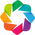

In [2]:
import time
import numpy as np
import pandas as pd
import holoviews as hv
import streamz
import streamz.dataframe

from holoviews import opts
from holoviews.streams import Pipe, Buffer

hv.extension('bokeh')

## ``Pipe``

A ``Pipe`` allows data to be pushed into a DynamicMap callback to change a visualization, just like the streams in the [Responding to Events](./12-Responding_to_Events.ipynb) user guide were used to push changes to metadata that controlled the visualization. A ``Pipe`` can be used to push data of any type and make it available to a ``DynamicMap`` callback. Since all ``Element`` types accept ``data`` of various forms we can use ``Pipe`` to push data directly to the constructor of an ``Element`` through a DynamicMap.


We can take advantage of the fact that most Elements can be instantiated without providing any data, so we declare the the ``Pipe`` with an empty list, declare the ``DynamicMap``, providing the pipe as a stream, which will dynamically update a ``VectorField`` :

In [3]:
pipe = Pipe(data=[])
vector_dmap = hv.DynamicMap(hv.VectorField, streams=[pipe])
vector_dmap.opts(color='Magnitude', xlim=(-1, 1), ylim=(-1, 1))

BokehModel(combine_events=True, render_bundle={'docs_json': {'dd7c2840-beb2-4dc8-a469-5336562fc6e3': {'version…

<img class="gif" src="https://assets.holoviews.org/gifs/guides/user_guide/Streaming_Data/pipe_vectorfield.gif"></img>

Having set up this ``VectorField`` tied to a ``Pipe`` we can start pushing data to it varying the orientation of the VectorField:

In [4]:
x,y  = np.mgrid[-10:11,-10:11] * 0.1
sine_rings  = np.sin(x**2+y**2)*np.pi+np.pi
exp_falloff = 1/np.exp((x**2+y**2)/8)

for i in np.linspace(0, 1, 25):
    time.sleep(0.1)
    pipe.send((x,y,sine_rings*i, exp_falloff))

This approach of using an element constructor directly does not allow you to use anything other than the default key and value dimensions. One simple workaround for this limitation is to use ``functools.partial`` as demonstrated in the **Controlling the length section** below.

Since ``Pipe`` is completely general and the data can be any custom type, it provides a completely general mechanism to stream structured or unstructured data. Due to this generality, ``Pipe`` does not offer some of the more complex features and optimizations available when using the ``Buffer`` stream described in the next section.

## ``Buffer``

While ``Pipe`` provides a general solution for piping arbitrary data to ``DynamicMap`` callback,  ``Buffer`` on the other hand provides a very powerful means of working with streaming tabular data, defined as pandas dataframes, arrays or dictionaries of columns (as well as StreamingDataFrame, which we will cover later). ``Buffer`` automatically accumulates the last ``N`` rows of the tabular data, where ``N`` is defined by the ``length``.

The ability to accumulate data allows performing operations on a recent history of data, while plotting backends (such as bokeh) can optimize plot updates by sending just the latest patch. This optimization works only if the ``data`` object held by the ``Buffer`` is identical to the plotted ``Element`` data, otherwise all the data will be updated as normal.

#### A simple example: Brownian motion

To initialize a ``Buffer`` we have to provide an example dataset which defines the columns and dtypes of the data we will be streaming. Next we define the ``length`` to keep the last 100 rows of data. If the data is a DataFrame we can specify whether we will also want to use the ``DataFrame`` ``index``. In this case we will simply define that we want to plot a ``DataFrame`` of 'x' and 'y' positions and a 'count' as ``Points`` and ``Curve`` elements:

In [5]:
example = pd.DataFrame({'x': [], 'y': [], 'count': []}, columns=['x', 'y', 'count'])
dfstream = Buffer(example, length=100, index=False)
curve_dmap = hv.DynamicMap(hv.Curve, streams=[dfstream])
point_dmap = hv.DynamicMap(hv.Points, streams=[dfstream])

After applying some styling we will display an ``Overlay`` of the dynamic ``Curve`` and ``Points``

In [6]:
(curve_dmap * point_dmap).opts(
    opts.Points(color='count', line_color='black', size=5, padding=0.1, xaxis=None, yaxis=None),
    opts.Curve(line_width=1, color='black'))

BokehModel(combine_events=True, render_bundle={'docs_json': {'9e71d622-e4ba-413b-8669-12ac7a09a749': {'version…

<img class="gif" src="https://assets.holoviews.org/gifs/guides/user_guide/Streaming_Data/brownian.gif"></img>

Now that we have set up the ``Buffer`` and defined a ``DynamicMap`` to plot the data we can start pushing data to it. We will define a simple function which simulates brownian motion by accumulating x, y positions. We can ``send`` data through the ``hv.streams.Buffer`` directly.

In [7]:
def gen_brownian():
    x, y, count = 0, 0, 0
    while True:
        x += np.random.randn()
        y += np.random.randn()
        count += 1
        yield pd.DataFrame([(x, y, count)], columns=['x', 'y', 'count'])

brownian = gen_brownian()
for i in range(200):
    dfstream.send(next(brownian))

Finally we can clear the data on the stream and plot using the ``clear`` method:

In [8]:
dfstream.clear()

Note that when using the ``Buffer`` stream the view will always follow the current range of the data by default, by setting ``buffer.following=False`` or passing following as an argument to the constructor this behavior may be disabled.

## Using the Streamz library

Now that we have discovered what ``Pipe`` and ``Buffer`` can do it's time to show how you can use them together with the ``streamz`` library. Although HoloViews does not depend on ``streamz`` and you can use the streaming functionality without needing to learn about it, the two libraries work well together, allowing you to build pipelines to manage continuous streams of data. Streamz is easy to use for simple tasks, but also supports complex pipelines that involve branching, joining, flow control, feedback and more. Here we will mostly focus on connecting streamz output to ``Pipe`` and then ``Buffer`` so for more details about the streamz API, consult the [streamz documentation](https://streamz.readthedocs.io/en/latest/).

#### Using ``streamz.Stream`` together with ``Pipe``

Let's start with a fairly simple example:

1. Declare a ``streamz.Stream`` and a ``Pipe`` object and connect them into a pipeline into which we can push data. 
2. Use a ``sliding_window`` of 10, which will first wait for 10 sets of stream updates to accumulate. At that point and for every subsequent update, it will apply ``pd.concat`` to combine the most recent 10 updates into a new dataframe.
3. Use the ``sink`` method on the ``streamz.Stream`` to ``send`` the resulting collection of 10 updates to ``Pipe``.
4. Declare a ``DynamicMap`` that takes the sliding window of concatenated DataFrames and displays it using a ``Scatter`` Element.
5. Color the ``Scatter`` points by their 'count' and set a range, then display:

In [9]:
point_source = streamz.Stream()
pipe = Pipe(data=pd.DataFrame({'x': [], 'y': [], 'count': []}))
point_source.sliding_window(20).map(pd.concat).sink(pipe.send) # Connect streamz to the Pipe
scatter_dmap = hv.DynamicMap(hv.Scatter, streams=[pipe])

After set up our streaming pipeline we can again display it:

In [10]:
scatter_dmap.opts(bgcolor='black', color='count', ylim=(-4, 4), show_legend=False)

BokehModel(combine_events=True, render_bundle={'docs_json': {'f1855157-3376-480d-a234-0a0434b83b84': {'version…

<img class="gif" src="https://assets.holoviews.org/gifs/guides/user_guide/Streaming_Data/streamz1.gif"></img>

There is now a pipeline, but initially this plot will be empty, because no data has been sent to it. To see the plot update, let's use the ``emit`` method of ``streamz.Stream`` to send small chunks of random pandas ``DataFrame``s to our plot:

In [11]:
for i in range(100):
    df = pd.DataFrame({'x': np.random.rand(100), 'y': np.random.randn(100), 'count': i},
                      columns=['x', 'y', 'count'])
    point_source.emit(df)

#### Using StreamingDataFrame and StreamingSeries

The streamz library provides ``StreamingDataFrame`` and ``StreamingSeries`` as a powerful way to easily work with live sources of tabular data. This makes it perfectly suited to work with ``Buffer``. With the ``StreamingDataFrame`` we can easily stream data, apply computations such as cumulative and rolling statistics and then visualize the data with HoloViews.

The ``streamz.dataframe`` module provides a ``Random`` utility that generates a ``StreamingDataFrame`` that emits random data with a certain frequency at a specified interval. The ``example`` attribute lets us see the structure and dtypes of the data we can expect:

In [12]:
simple_sdf = streamz.dataframe.Random(freq='10ms', interval='100ms')
print(simple_sdf.index)
simple_sdf.example.dtypes

Index - elements like:
DatetimeIndex([], dtype='datetime64[ns]', freq='10L')


x    float64
y      int64
z    float64
dtype: object

Since the ``StreamingDataFrame`` provides a pandas-like API, we can specify operations on the data directly. In this example we subtract a fixed offset and then compute the cumulative sum, giving us a randomly drifting timeseries. We can then pass the x-values of this dataframe to the HoloViews ``Buffer`` and supply ``hv.Curve`` as the ``DynamicMap`` callback to stream the data into a HoloViews ``Curve`` (with the default key and value dimensions):

In [13]:
sdf = (simple_sdf-0.5).cumsum()
hv.DynamicMap(hv.Curve, streams=[Buffer(sdf.x)]).opts(width=500, show_grid=True)

BokehModel(combine_events=True, render_bundle={'docs_json': {'6b3cce17-c300-46da-af39-a6a4270f9240': {'version…

<img class="gif" src="https://assets.holoviews.org/gifs/guides/user_guide/Streaming_Data/streamz3.gif"></img>

The ``Random`` StreamingDataFrame will asynchronously emit events, driving the visualization forward, until it is explicitly stopped, which we can do by calling the ``stop`` method.

In [14]:
simple_sdf.stop()

#### Making use of the ``StreamingDataFrame`` API

So far we have only computed the cumulative sum, but the ``StreamingDataFrame`` actually has an extensive API that lets us run a broad range of streaming computations on our data. For example, let's apply a rolling mean to our x-values with a window of 500ms and overlay it on top of the 'raw' data:

In [15]:
source_df = streamz.dataframe.Random(freq='5ms', interval='100ms')
sdf = (source_df-0.5).cumsum()
raw_dmap = hv.DynamicMap(hv.Curve, streams=[Buffer(sdf.x)])
smooth_dmap = hv.DynamicMap(hv.Curve, streams=[Buffer(sdf.x.rolling('500ms').mean())])

(raw_dmap.relabel('raw') * smooth_dmap.relabel('smooth')).opts(
    opts.Curve(width=500, show_grid=True))

BokehModel(combine_events=True, render_bundle={'docs_json': {'cd0063e3-8db1-4076-8023-0d02357b437c': {'version…

<img class="gif" src="https://assets.holoviews.org/gifs/guides/user_guide/Streaming_Data/streamz4.gif"></img>

In [16]:
source_df.stop()

#### Customizing elements with ``functools.partial``

In this notebook we have avoided defining custom functions for ``DynamicMap`` by simply supplying the element class and using the element constructor instead. Although this works well for examples, it often won't generalize to real-life situations, because you don't have an opportunity to use anything other than the default dimensions. One simple way to get around this limitation is to use ``functools.partial``:



In [17]:
from functools import partial

Now you can now easily create an inline callable that creates an element with custom key and value dimensions by supplying them to ``partial`` in the form ``partial(hv.Element, kdims=[...], vdims=[...])``. In the next section, we will see an example of this pattern using ``hv.BoxWhisker``.

#### Controlling the length

By default the ``Buffer`` accumulates a ``length`` of 1000 samples. In many cases this may be excessive, but we can specify a shorter (or longer) length value to control how much history we accumulate, often depending on the element type.

In the following example, a custom ``length`` is used together with a ``partial`` wrapping ``hv.BoxWhisker`` in order to display a cumulative sum generated from a stream of random dataframes:

In [18]:
multi_source = streamz.dataframe.Random(freq='50ms', interval='500ms')
sdf = (multi_source-0.5).cumsum()
hv.DynamicMap(hv.Table, streams=[Buffer(sdf.x, length=10)]) +\
hv.DynamicMap(partial(hv.BoxWhisker, kdims=[], vdims='x'), streams=[Buffer(sdf.x, length=100)])

BokehModel(combine_events=True, render_bundle={'docs_json': {'358e0452-b8b2-4f8a-a7d0-dd3ec2314250': {'version…

<img class="gif" src="https://assets.holoviews.org/gifs/guides/user_guide/Streaming_Data/streamz5.gif"></img>

Here the given stream ``sdf`` is being consumed by a table showing a short length (where only the items visible in the table need to be kept), along with a plot computing averages and variances over a longer length (100 items).

#### Updating multiple cells

Since a ``StreamingDataFrame`` will emit data until it is stopped, we can subscribe multiple plots across different cells to the same stream.  Here, let's add a ``Scatter`` plot of the same data stream as in the preceding cell:

In [19]:
hv.DynamicMap(hv.Scatter, streams=[Buffer(sdf.x)]).redim.label(x='value', index='time')

BokehModel(combine_events=True, render_bundle={'docs_json': {'b8a72c32-f8e9-452f-9c24-1010f6697ad1': {'version…

<img class="gif" src="https://assets.holoviews.org/gifs/guides/user_guide/Streaming_Data/streamz6.gif"></img>

Here we let the ``Scatter`` elements use the column names from the supplied ``DataFrames`` which are relabelled using the ``redim`` method. Stopping the stream will now stop updates to all three of these DynamicMaps:

In [20]:
multi_source.stop()

## Operations over streaming data

As we discovered above, the ``Buffer`` lets us set a ``length``, which defines how many rows we want to accumulate. We can use this to our advantage and apply an operation over this length window. In this example we declare a ``Dataset`` and then apply the ``histogram`` operation to compute a ``Histogram`` over the specified ``length`` window:

In [21]:
hist_source = streamz.dataframe.Random(freq='5ms', interval='100ms')
sdf = (hist_source-0.5).cumsum()
dmap = hv.DynamicMap(hv.Dataset, streams=[Buffer(sdf.x, length=500)])
hv.operation.histogram(dmap, dimension='x')

BokehModel(combine_events=True, render_bundle={'docs_json': {'e4d3b1d8-7678-4867-9fc6-81345f3c6eff': {'version…

<img class="gif" src="https://assets.holoviews.org/gifs/guides/user_guide/Streaming_Data/streamz7.gif"></img>

In [22]:
hist_source.stop()

#### Datashading

The same approach will also work for the datashader operation letting us datashade the entire ``length`` window even if we make it very large such as 1 million samples:

In [25]:
from holoviews.operation.datashader import datashade
from bokeh.palettes import Blues8

large_source = streamz.dataframe.Random(freq='100us', interval='200ms')
sdf = (large_source-0.5).cumsum()
dmap = hv.DynamicMap(hv.Curve, streams=[Buffer(sdf.x, length=1000000)])
datashade(dmap, streams=[hv.streams.PlotSize], cnorm='linear', cmap=list(Blues8)).opts(width=600)

BokehModel(combine_events=True, render_bundle={'docs_json': {'9f93fd2b-3ec2-44f2-93c5-9d3b21d49695': {'version…

<img class="gif" src="https://assets.holoviews.org/gifs/guides/user_guide/Streaming_Data/streamz8.gif"></img>

In [26]:
large_source.stop()

## Asynchronous updates using the tornado ``IOLoop``

In most cases, instead of pushing updates manually from the same Python process, you'll want the object to update asynchronously as new data arrives. Since both Jupyter and Bokeh server run on [tornado](http://www.tornadoweb.org/en/stable/), we can use the tornado ``IOLoop`` in both cases to define a non-blocking co-routine that can push data to our stream whenever it is ready. The ``PeriodicCallback`` makes this approach very simple, we simply define a function which will be called periodically with a timeout defined in milliseconds. Once we have declared the callback we can call ``start`` to begin emitting events:

In [27]:
from tornado.ioloop import PeriodicCallback
from tornado import gen

count = 0
buffer = Buffer(np.zeros((0, 2)), length=50)

@gen.coroutine
def f():
    global count
    count += 1
    buffer.send(np.array([[count, np.random.rand()]]))

cb = PeriodicCallback(f, 100)
cb.start()

hv.DynamicMap(hv.Curve, streams=[buffer]).opts(padding=0.1, width=600)

BokehModel(combine_events=True, render_bundle={'docs_json': {'2c7109e6-0d99-4557-ba71-e913c88ce063': {'version…

<img class="gif" src="https://assets.holoviews.org/gifs/guides/user_guide/Streaming_Data/streamz2.gif"></img>

Since the callback is non-blocking we can continue working in the notebook and execute other cells. Once we're done we can stop the callback by calling ``cb.stop()``.

In [ ]:
cb.stop()

## Real examples

Using the ``Pipe`` and ``Buffer`` streams we can create complex streaming plots very easily. In addition to the toy examples we presented in this guide it is worth looking at looking at some of the examples using real, live, streaming data.

* The [streaming_psutil](http://holoviews.org/gallery/apps/bokeh/streaming_psutil.html) bokeh app is one such example which display CPU and memory information using the ``psutil`` library  (install with ``pip install psutil`` or ``conda install psutil``)

<img class="gif" src="https://assets.holoviews.org/gifs/guides/user_guide/Streaming_Data/streamz9.gif"></img>

As you can see, streaming data works like streams in HoloViews in general, flexibly handling changes over time under either explicit control or governed by some external data source.